# Scikit-learn opdrachten


## 1: data inladen en exploratie
### Opdracht 1a: Data inladen vanuit scikitlearn.dataset module
Laad de iris dataset van de module ``sklearn.datasets`` met behulp van de functie ``load_iris``.
De functie returnt een object en heeflt dezelfde attributen als de digits dataset.

**Wat is het aantal instanties, features (ookwel attributen) en unieke labels (ookwel target of klassen) in deze dataset? Gebruik een scatterplot om de dataset te visualiseren. Je kunt zelf kiezen welke features je tegen elkaar uitzet in de scatterplot.**

*Tip: Je kunt het attribuut ``DESCR`` bekijken om meer te weten te komen over de dataset.*

Dataset size: 150 
Number of features: 4 
Number of classes: 3


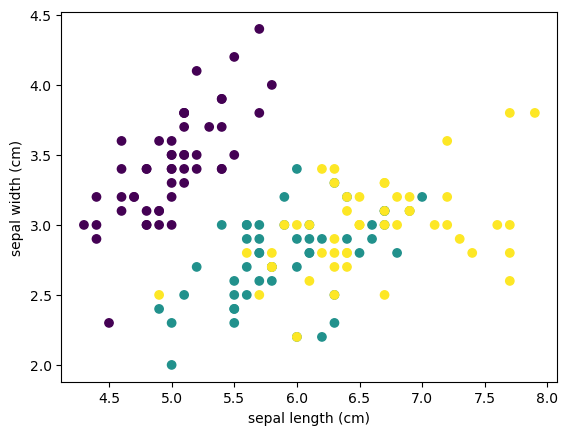

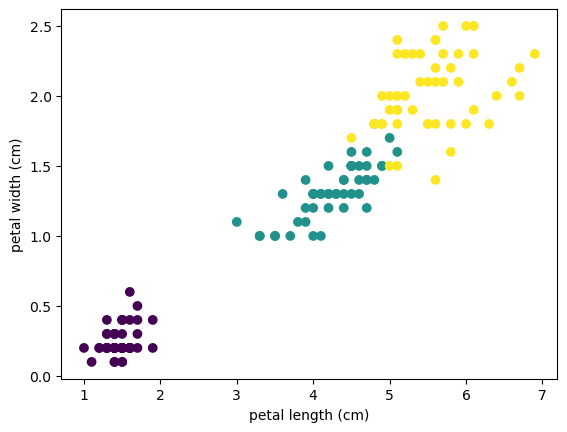

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [12]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np 

iris = load_iris()

X, y = iris.data, iris.target
print("Dataset size: %d \nNumber of features: %d \nNumber of classes: %d"
      % (X.shape[0], X.shape[1], len(np.unique(y))))

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

plt.scatter(X[:, 2], X[:, 3], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

print(iris.DESCR)

### Opdracht 1b: data inladen vanuit een csv-bestand
Normaal gesproken staat je data niet kant en klaar in de scikit library, je zult in de praktijk meemaken dat je een csv-bestand moet inlezen en in de juiste format moet gieten. Probeer nu het csv bestand 'iris.csv' dat op de DLO staat als pandas dataframe in te laden en gebruik dit voor de volgende opdracht. 

Let op: de labels (de kolom 'class') moet worden verwijderd uit de dataset voordat je het model gaat trainen!

In [2]:
import pandas as pd
iris_csv = pd.read_csv("iris.csv")
X = iris_csv.drop(columns='class')
iris_csv

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 2: Supervised learning
### Opdracht 2a: Data splitten
We gaan proberen om een classificatie uit te voeren op basis van de ingeladen iris dataset. De eerste stap is om de dataset op te splitsen in training and testset via train_test_split. 

**Hoeveel instanties zitten er in de training en tetssets? Komt dit overeen met de verhouding die in de documentatie staat?**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)

print(f"Aantal instanties in de trainingsset: {len(X_train)}")
print(f"Aantal instanties in de testset: {len(X_test)}")

Aantal instanties in de trainingsset: 112
Aantal instanties in de testset: 38


### Opdracht 2b: Initialiseren, trainen en evalueren van verschillende modellen
Train en evalueer vervolgens de sklearn.neighbors.KNeighborsClassifier, the RandomForestClassifier and sklearn.linear_model.LogisticRegression op de iris dataset.

Kijk vervolgens kritisch naar het resultaat en probeer wat vragen te beantwoorden: Hoe performt deze op de training set vs de test set? Welke is het op de training set, welke is het best op de test set? 

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model 1: KNeighborsClassifier
knn = KNeighborsClassifier() # eventueel n_neighbors=3
knn.fit(X_train, y_train)
knn_train_score = knn.score(X_train, y_train)
knn_test_score = knn.score(X_test, y_test)
print("KNeighborsClassifier:")
print(f"Score van trainingset: {knn_train_score:.2f}")
print(f"Score van testset: {knn_test_score:.2f}")
print("-" * 50)

# Model 2: RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print("RandomForestClassifier:")
print(f"Score van trainingset: {rf_train_score:.2f}")
print(f"Score van testset: {rf_train_score:.2f}")
print("-" * 50)

# Model 3: LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
print("LogisticRegression:")
print(f"Score van trainingset: {lr_train_score:.2f}")
print(f"Score van testset: {lr_train_score:.2f}")

KNeighborsClassifier:
Score van trainingset: 0.99
Score van testset: 0.95
--------------------------------------------------
RandomForestClassifier:
Score van trainingset: 1.00
Score van testset: 1.00
--------------------------------------------------
LogisticRegression:
Score van trainingset: 0.98
Score van testset: 0.98


### Opdracht 2c: Evaluatie van de modellen (uitgebreide evaluatie mbv de classification_report module)

In [5]:
from sklearn.metrics import classification_report

models = [
    ("KNeighborsClassifier", KNeighborsClassifier()),
    ("RandomForestClassifier", RandomForestClassifier()),
    ("LogisticRegression", LogisticRegression())
]

# Training, voorspellen en classificatierapport genereren
for name, model in models:
    print(f"Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=iris.target_names))
    print("-" * 50)

Model: KNeighborsClassifier
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.89      0.94        19
   virginica       0.83      1.00      0.91        10

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.95        38
weighted avg       0.96      0.95      0.95        38

--------------------------------------------------
Model: RandomForestClassifier
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.95      0.97        19
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38

--------------------------------------------------
Model: LogisticRegression
              precision    recall  f1-score   suppor

### Opdracht 2d: Extra opdracht:
Wat meer uitdaging: 
Constueer twee binaire classificatiedataset van 1000 insanties met ieder 3 attributen (bijvoorbeeld met behulp van np.random). De eerste dataset moet een classificatie nauwkeurigheid hebben van '1', de ander moet een nauwkeurigheid van '0.5' hebben. 

waarop sklearn.linear_model.LogisticRegression een nauwkeurigheid van 1 bereikt? Kun je een binair classificatiedataset construeren waarop het een nauwkeurigheid van 0,5 behaalt?

In [6]:
# Perfect classification (accuracy=1) on easy dataset
X = np.random.uniform(size=(100, 3))
X[::2] += 1000
y = X[:, 0] > 500
X_train, X_test, y_train, y_test = train_test_split(X, y)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("score on trivial data: ", logreg.score(X_test, y_test))

# Random classification (accuracy=.5) on random data
y = np.random.normal(size=100) > .0
X_train, X_test, y_train, y_test = train_test_split(X, y)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("score on random data: ", logreg.score(X_test, y_test))

score on trivial data:  1.0
score on random data:  0.64
